In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
import time, datetime
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from xgboost import XGBClassifier

import warnings 
warnings.simplefilter('ignore')

pd.set_option('display.max_columns',None)

In [39]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [40]:
train = pd.read_csv("/content/drive/My Drive/Colab Notebooks/haikuJAM/BuyAffinity_Train.txt", delimiter="\t")
test = pd.read_csv("/content/drive/My Drive/Colab Notebooks/haikuJAM/BuyAffinity_Test.txt", delimiter="\t")

In [41]:
train['F15']=pd.to_datetime(train['F15'])
train['F16']=pd.to_datetime(train['F16'])     # converting F15 adn F16 into datetime variables

train.index = train["Index"]                  # index of dataframe

dates_train = train[["F15", "F16"]]
dates_test = test[["F15", "F16"]]

train = train.drop(["F15","F16", "Index"], axis=1)
test = test.drop(["F15","F16","Index"], axis=1)

train.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F17,F18,F19,F20,F21,F22,C
Index,,,,,,,,,,,,,,,,,,,,,
1,0.224506,0.500340,0.489860,0.902413,7934,-6970,-5714,9982,-5697,4227810299,-3918676258,316195953,6176861823,-3433637453,2,1,706,305,1,2,0
2,0.321128,0.281119,0.907283,0.772159,-8238,1219,1663,1287,-3658,-1146724819,-6837090439,1378635942,-9031507610,609277486,1,1,423,206,18,7,1
3,0.893441,0.622005,0.998776,0.098386,8540,5266,-9377,-3504,-4511,5947184989,6881163164,-9921889287,-5610051842,-8977995005,2,1,703,315,1,4,0
4,0.320641,0.957234,0.346000,0.646479,-7772,-383,9681,-8661,3474,-5724795826,-6014104498,6550322883,-4697085930,4868760308,1,1,122,304,15,1,0
5,0.475961,0.623008,0.544988,0.159709,1571,-8039,-7961,-2385,4407,-3097637172,-9755731483,759031103,9984692447,9757408267,1,1,486,240,1,1,0


In [42]:
train.shape

(101180, 21)

In [43]:
train.describe()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F17,F18,F19,F20,F21,F22,C
count,101180.000000,101180.000000,101180.000000,101180.000000,101180.000000,101180.000000,101180.000000,101180.000000,101180.000000,1.011800e+05,1.011800e+05,1.011800e+05,1.011800e+05,1.011800e+05,101180.000000,101180.000000,101180.000000,101180.000000,101180.000000,101180.000000,101180.000000
mean,0.502348,0.501497,0.499886,0.499839,-29.742617,1.511000,7.939118,16.434147,9.927812,1.869749e+07,-7.052456e+06,6.921685e+06,1.127538e+07,-5.198163e+07,1.339593,1.335027,387.181479,387.333999,4.588031,4.598567,0.245375
std,0.288058,0.289017,0.288875,0.288729,5781.829379,5796.594007,5765.581875,5782.805211,5771.004738,5.769064e+09,5.779111e+09,5.771750e+09,5.786659e+09,5.782358e+09,0.894065,0.882435,235.939585,235.374285,4.775671,4.776494,0.430311
min,0.000018,0.000004,0.000002,0.000006,-10000.000000,-10000.000000,-10000.000000,-10000.000000,-10000.000000,-9.999816e+09,-9.999804e+09,-9.999754e+09,-9.999852e+09,-9.999767e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,0.253819,0.251115,0.248818,0.250501,-5045.000000,-5012.000000,-4979.000000,-4988.000000,-4992.250000,-4.966961e+09,-4.994511e+09,-4.991278e+09,-5.027003e+09,-5.070403e+09,1.000000,1.000000,187.000000,187.000000,1.000000,1.000000,0.000000
50%,0.501802,0.501095,0.499820,0.501387,-46.000000,-11.500000,16.500000,60.000000,22.500000,4.346691e+07,-5.477172e+07,4.277384e+07,9.416236e+06,-8.816174e+07,1.000000,1.000000,374.000000,375.000000,3.000000,3.000000,0.000000
75%,0.753598,0.752404,0.750281,0.748803,4978.000000,5050.000000,4962.000000,5021.000000,5020.000000,5.019440e+09,4.994296e+09,5.008238e+09,5.032947e+09,4.947133e+09,1.000000,1.000000,560.000000,561.000000,7.000000,7.000000,0.000000
max,0.999986,0.999990,0.999985,0.999977,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,9.999497e+09,9.999897e+09,9.999555e+09,9.999951e+09,9.999997e+09,6.000000,6.000000,901.000000,901.000000,21.000000,21.000000,1.000000


Class Distribution in dataframe

For class 0 :76353 
For class 1 :24827


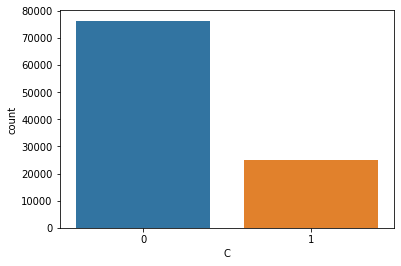

In [44]:
temp = train['C'].value_counts()
print("For class 0 :{} \nFor class 1 :{}".format(temp[0], temp[1]))
sns.countplot(train['C'])

# it doesn't seems imbalanced one 

In [45]:
train.isnull().sum()   # No null values

F1     0
F2     0
F3     0
F4     0
F5     0
F6     0
F7     0
F8     0
F9     0
F10    0
F11    0
F12    0
F13    0
F14    0
F17    0
F18    0
F19    0
F20    0
F21    0
F22    0
C      0
dtype: int64

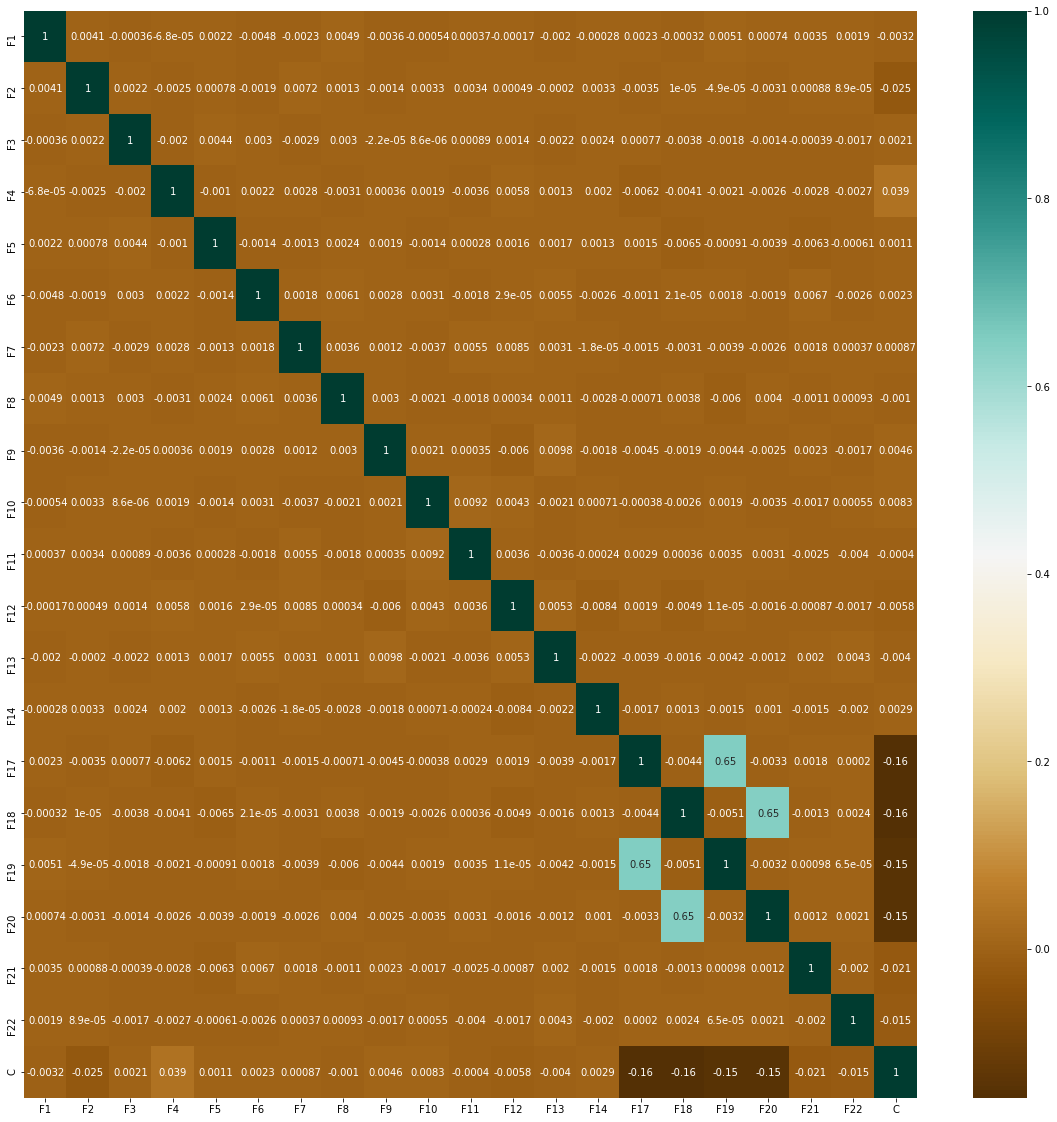

In [46]:
# Correlation map if dataframe

fig= plt.figure(figsize=(20,20))
sns.heatmap(train.corr(), annot=True,cmap='BrBG')

In [47]:
# Feature 17 & 19 are correlated
# Feature 18 & 20 are correlated

train = train.drop(["F17", "F18"], axis=1)

In [48]:
# Creating features from dates

train["day"] = [i.days for i in dates_train["F15"] - dates_train["F16"]]
train["week"] = ((dates_train["F15"] - dates_train["F16"])/np.timedelta64(1, 'W')).astype('int')
train["month"] = ((dates_train["F15"] - dates_train["F16"])/np.timedelta64(1, 'M')).astype('int')
train["year"] = ((dates_train["F15"] - dates_train["F16"])/np.timedelta64(1, 'Y')).astype('int')

In [49]:
train.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F17,F18,F19,F20,F21,F22,C,day,week,month,year
Index,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.224506,0.500340,0.489860,0.902413,7934,-6970,-5714,9982,-5697,4227810299,-3918676258,316195953,6176861823,-3433637453,2,1,706,305,1,2,0,-2164,-309,-71,-5
2,0.321128,0.281119,0.907283,0.772159,-8238,1219,1663,1287,-3658,-1146724819,-6837090439,1378635942,-9031507610,609277486,1,1,423,206,18,7,1,-1411,-201,-46,-3
3,0.893441,0.622005,0.998776,0.098386,8540,5266,-9377,-3504,-4511,5947184989,6881163164,-9921889287,-5610051842,-8977995005,2,1,703,315,1,4,0,782,111,25,2
4,0.320641,0.957234,0.346000,0.646479,-7772,-383,9681,-8661,3474,-5724795826,-6014104498,6550322883,-4697085930,4868760308,1,1,122,304,15,1,0,-3765,-537,-123,-10
5,0.475961,0.623008,0.544988,0.159709,1571,-8039,-7961,-2385,4407,-3097637172,-9755731483,759031103,9984692447,9757408267,1,1,486,240,1,1,0,538,76,17,1


In [50]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, roc_auc_score, roc_curve

y= train["C"]
train = train.drop("C", axis=1)
xtrain, xtest, ytrain, ytest=train_test_split(train, y, test_size=0.3)

In [51]:
from sklearn.preprocessing import StandardScaler  # for the scaling 
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
scaler = StandardScaler()
xtest = scaler.fit_transform(xtest)

In [ ]:
# trying removing outlier in the data 

z_scores = stats.zscore(train)

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
train = train[filtered_entries]

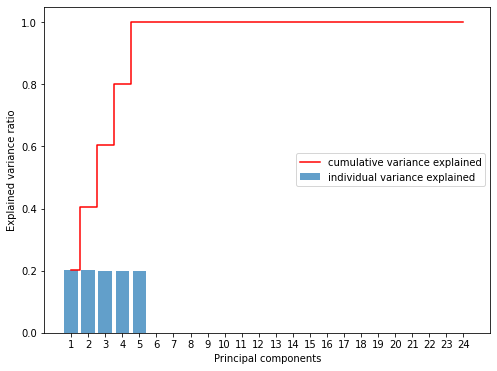

PC1 Cumulative variance: 20.242%
PC2 Cumulative variance: 40.451%
PC3 Cumulative variance: 60.439%
PC4 Cumulative variance: 80.238%
PC5 Cumulative variance: 100.000%
PC6 Cumulative variance: 100.000%
PC7 Cumulative variance: 100.000%
PC8 Cumulative variance: 100.000%
PC9 Cumulative variance: 100.000%
PC10 Cumulative variance: 100.000%
PC11 Cumulative variance: 100.000%
PC12 Cumulative variance: 100.000%
PC13 Cumulative variance: 100.000%
PC14 Cumulative variance: 100.000%
PC15 Cumulative variance: 100.000%
PC16 Cumulative variance: 100.000%
PC17 Cumulative variance: 100.000%
PC18 Cumulative variance: 100.000%
PC19 Cumulative variance: 100.000%
PC20 Cumulative variance: 100.000%
PC21 Cumulative variance: 100.000%
PC22 Cumulative variance: 100.000%
PC23 Cumulative variance: 100.000%
PC24 Cumulative variance: 100.000%


In [52]:
from sklearn.decomposition import PCA

pca = PCA(random_state = 7)
pca.fit(train)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
plt.figure(figsize=(8,6))
plt.bar(range(1,len(cum_var_exp)+1), var_exp, align= 'center', label= 'individual variance explained', \
       alpha = 0.7)
plt.step(range(1,len(cum_var_exp)+1), cum_var_exp, where = 'mid' , label= 'cumulative variance explained', \
        color= 'red')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.xticks(np.arange(1,len(var_exp)+1,1))
plt.legend(loc='center right')
plt.show()

# Cumulative variance explained
for i, sum in enumerate(cum_var_exp):
    print("PC" + str(i+1), "Cumulative variance: %.3f% %" %(cum_var_exp[i]*100))

It appears that about 100 % of the variance can be explained with the first 5 principal components. However feeding the PCA features to the learning algorithms did not contribute to a better performance. This might be due to the non-linearites that PCA is not able to capture.

In [53]:
# Overfitting model 

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)
model.fit(xtrain,ytrain)
prediction = model.predict(xtest)

print("Training accuracy : ",model.score(xtrain, ytrain))
print("Test accuracy : ",model.score(xtest, ytest))

print("F1 score : ", f1_score(prediction, ytest))
print("Confusion metrics : \n", confusion_matrix(ytest, prediction))

Training accuracy :  0.9999858808911981
Test accuracy :  0.7545298807405943
F1 score :  0.04043786220218931
Confusion metrics : 
 [[22746   170]
 [ 7281   157]]


roc_auc_score :  0.30220871428161755


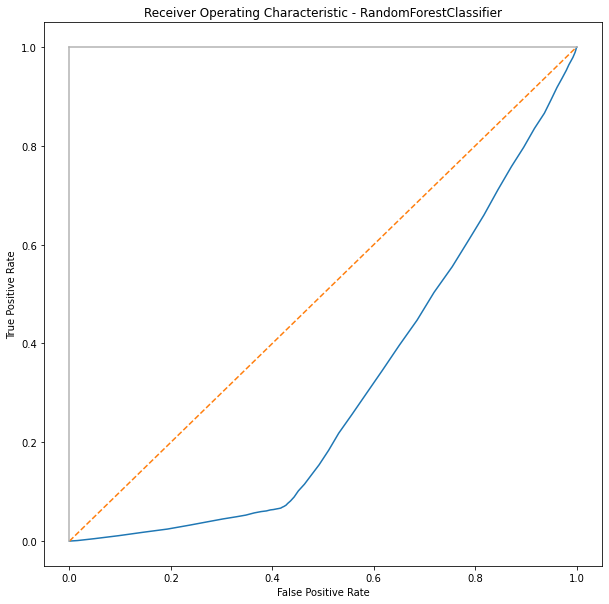

In [54]:
yscore = model.predict_proba(xtest)[:,0]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(ytest, yscore)
roc_rf = roc_auc_score(ytest, yscore)
print('roc_auc_score : ', roc_auc_score(ytest, yscore))

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - RandomForestClassifier')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()        # Not Effective

In [55]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

model = AdaBoostClassifier(n_estimators=400,learning_rate=1,algorithm='SAMME')
model.fit(xtrain, ytrain)
prediction = model.predict(xtest)

print("Accuracy : ", accuracy_score(prediction, ytest))
print("F1 score : ", f1_score(prediction, ytest))

print("Confusion metrics : \n", confusion_matrix(ytest, prediction))

Accuracy :  0.7549911049614548
F1 score :  0.00026885334050275576
Confusion metrics : 
 [[22916     0]
 [ 7437     1]]


roc_auc_score :  0.30745608979303674


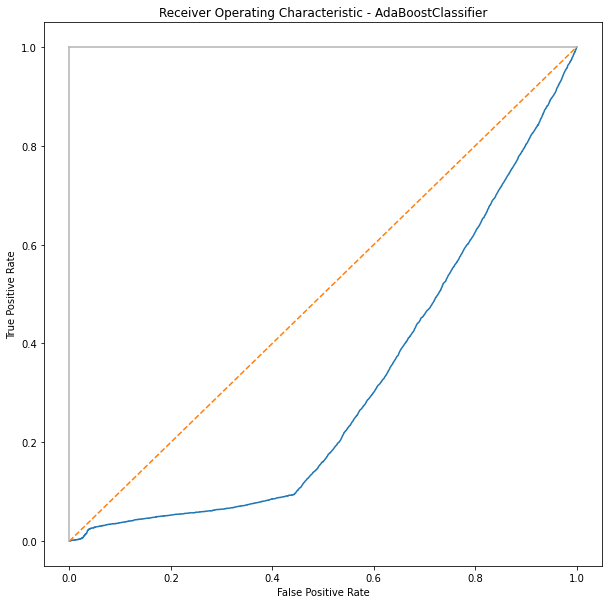

In [56]:
yscore = model.predict_proba(xtest)[:,0]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(ytest, yscore)
roc_ada = roc_auc_score(ytest, yscore)
print('roc_auc_score : ', roc_auc_score(ytest, yscore))

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - AdaBoostClassifier')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()     # not effective

In [57]:
from lightgbm import LGBMClassifier

model=LGBMClassifier()
model.fit(xtrain, ytrain)
prediction = model.predict(xtest)

print("Training accuracy : ",model.score(xtrain, ytrain))
print("Testing accuracy : ",model.score(xtest, ytest))

print("F1 score : ", f1_score(prediction, ytest))

print("Confusion metrics : \n", confusion_matrix(ytest, prediction))

Training accuracy :  0.7684748538672239
Testing accuracy :  0.7605916847861897
F1 score :  0.08024300721427667
Confusion metrics : 
 [[22770   146]
 [ 7121   317]]


roc_auc_score :  0.2752959110258817


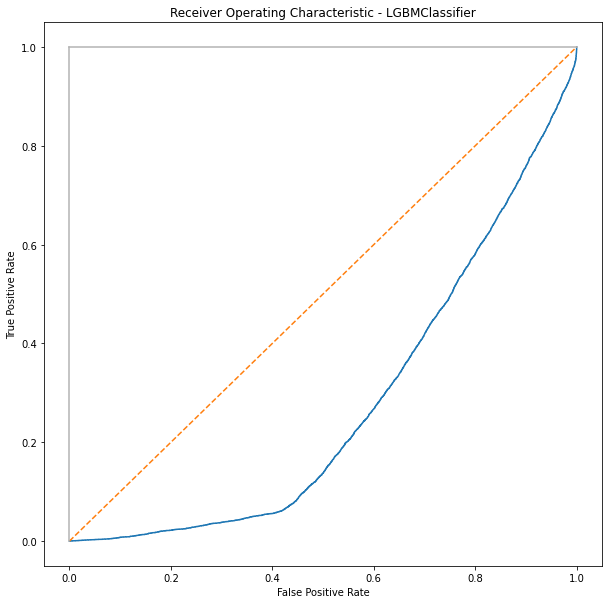

In [58]:
yscore = model.predict_proba(xtest)[:,0]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(ytest, yscore)
roc_lgbm = roc_auc_score(ytest, yscore)
print('roc_auc_score : ', roc_auc_score(ytest, yscore))

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - LGBMClassifier')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()     # Not Effective 

In [59]:
from keras.models import Sequential
from keras.layers import Activation,Dropout,Flatten,Dense,BatchNormalization
from keras import initializers
from tensorflow import keras

model=Sequential()
model.add(Dense(20,input_shape=(xtrain.shape[1],),activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(5,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))

optimizer=keras.optimizers.Adam(learning_rate=0.0001) 
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 20)                500       
_________________________________________________________________
dropout_20 (Dropout)         (None, 20)                0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 20)                80        
_________________________________________________________________
dense_31 (Dense)             (None, 5)                 105       
_________________________________________________________________
dropout_21 (Dropout)         (None, 5)                 0         
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 6         
Total params: 691
Trainable params: 651
Non-trainable params: 40
______________________________________________________

In [60]:
history = model.fit(xtrain,ytrain, epochs = 30)
loss, acc = model.evaluate(xtest,ytest)

print("loss :", loss, "accuracy :", acc)


Epoch 1/30
2214/2214 [==============================] - 3s 1ms/step - loss: 0.5482 - accuracy: 0.7414
Epoch 2/30
2214/2214 [==============================] - 3s 1ms/step - loss: 0.5084 - accuracy: 0.7545
Epoch 3/30
2214/2214 [==============================] - 3s 1ms/step - loss: 0.5043 - accuracy: 0.7545
Epoch 4/30
2214/2214 [==============================] - 3s 1ms/step - loss: 0.5039 - accuracy: 0.7545
Epoch 5/30
2214/2214 [==============================] - 3s 1ms/step - loss: 0.5019 - accuracy: 0.7545
Epoch 6/30
2214/2214 [==============================] - 3s 1ms/step - loss: 0.5005 - accuracy: 0.7544
Epoch 7/30
2214/2214 [==============================] - 3s 1ms/step - loss: 0.5011 - accuracy: 0.7545
Epoch 8/30
2214/2214 [==============================] - 3s 1ms/step - loss: 0.5007 - accuracy: 0.7545
Epoch 9/30
2214/2214 [==============================] - 3s 1ms/step - loss: 0.5001 - accuracy: 0.7545
Epoch 10/30
2214/2214 [==============================] - 3s 1ms/step - loss: 0.499

roc_auc_score :  0.6989352012712198


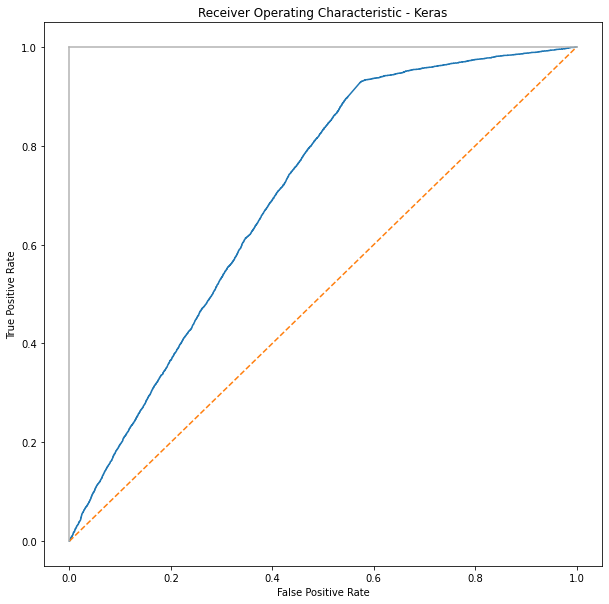

In [61]:
yscore = model.predict_proba(xtest)[:,0]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(ytest, yscore)
roc_keras = roc_auc_score(ytest, yscore)
print('roc_auc_score : ', roc_auc_score(ytest, yscore))

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Keras')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Approaches I tried :
- Checking of class imbalance problem. 
    - But class 1 are about thrice times of class 0
    - Over sampling method SMOTE I tried in the data but it didn't affect the accuracy  
- Tried removing Outlier Using z score method 
- Tried PCA to learn features in the new dimensions
- Tried expanding dates features into difference days, months, years
- Tried different ML and DL approaches for classification